In [2]:
import base64
import numpy as np
from PIL import Image
import io
import cv2

In [3]:
import matplotlib.pyplot as plt

In [22]:
canvas_img = "b'data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARgAAAEYCAYAAACHjumMAAAgAElEQVR4Xu1dB9R1R1XdqIgQEiAoEIokRkoUIjWUYAKRBAEpoReVGgIRVJBq6E2Q7qIF6QgJQihSpEqRhI5RKaEGBEITpAtiYW2ZA/NPZm6duXfe3H3Xeuv7//funTmzz7z9zpxz5szZoEsICAEhUAiBsxVqV80KASEgBCCC0SQQAkKgGAIimGLQqmEhIAREMJoDQkAIFENABFMMWjUsBISACEZzQAgIgWIIiGCKQauGhYAQEMFoDggBIVAMARFMMWjVsBAQAiIYzQEhIASKISCCKQatGhYCQkAEozkgBIRAMQREMMWgVcNCQAiIYDQHhIAQKIaACKYYtGpYCAgBEYzmgBAQAsUQEMEUg1YNCwEhIILRHBACQqAYAiKYYtCqYSEgBEQwmgNCQAgUQ0AEUwxaNSwEhIAIRnNACAiBYgiIYIpBq4aFgBAQwWgOCAEhUAwBEUwxaNWwEBACIhjNASEgBIohIIIpBq0aFgJCQASjOSAEhEAxBEQwxaBVw0JACIhgNAeEgBAohoAIphi0algICAERjOaAEBACxRAQwRSDVg0LASEggtEcEAJCoBgCIphi0KphISAERDCaA0JACBRDQARTDFo1LASEgAhGc2BXEdgbwE0BHAHg8gD2cwP5FoDPAfgUgJcD+EcA/7mrg9x1uUUwu67Bbcm/P4DrA7gjgEsDOHsw/P8F8D8A+JfXfzuieRKAl2wLqjpGK4KpQw+SIo3A9QDcEMBVABwIYC8ANm//zz1mf60VEoxPNt8B8D4AxwE4U2Avh4AIZjms1dNwBLjcuTWAWzhL5RcAnAPAz3c0QZIJiYb//5GzavjoZwD8FYDnDBdFd85BQAQzBz09mxuBawD4fQA3BrAvgJ9zHXCeDp2rtjzyZSPJcLn0AwCfBXAkgG/mFl7tnRWBoUoTdkKgJAL0pzwSwO84S+UXA2IJ52loqYSyxawZIxk6gZ8H4EElB6S2f4KACEYzYU0ESCx/AOAYAOd0FguXQnbRgumao11EE7Nkfuh8M19z/pg3rDn4LfQtgtmClusbI4nlRgDuAuACnrVCcrE5acuivjk6hmQYYfovt1x6O4DbAvh+ffC0I1Gf8toZqUZSAwLMWbkTgEOdxUI/i81BWhx04pIwhpKLjSlFMrGlEv0wfJ++mDsA+EANwLQqgwimVc3WMa5zufDyIS4idElPrF8Klj/m0PUlHzM/h5IMnb30x3CZ9FAAL6wDqjalGKPANhHQqHIjcGFnGRwO4CAA5wHAMDNftFJIBCQTP+QcRommzMuhBEMZ6Ithdu9zAdw/NwBq72cITFGk8BMCMQSOAnAsgMMA0DrhRSJhRMifZ0Ym/vIlB8GwvxjJhMskIxj+fYdL4pNGCyEggikE7EaaPTcAEssfA7isIxMbOsnFjwjZ+yGZmM9l6tLIfy5lxfgRJSMYOntPEcGUnakimLL4ttr6ZQDc1ZHLRd2eILMU7C+XQCm/St+86/s8hesYgvkegOdriVR2ik5VZFmp1HqtCHA/0P1cQhzJo89KiUVxUqTjk8OceRkjmZgFw0ze4+XkLTvV5iiyrGRqvSYEDnA5KwzrcrOhXVwChYQRS+v3iaYrWmTkMGde9hGMH0XiXieFqQvOtDmKLCiWmq4EAZLJrQD8GYCLBTKxVAIjQ+EVIxjeYySzNMGEVhQjSPS/vMfVk1GiXcHJJoIpCO6ON30DAPcAcLDbeBg6U1M7m2MEYs/GHLr8zJ+Hc62Y2I5qe49/mWj3JeeY1laBwpNUBFMY4B1s/lrON3E5FwUKE+KMEGzuhBZCF8GYJRObd357IekMhXHI8ugbrlyDNjsORXXGfSKYGeA1+OhD3C+77WYeswzqWgINgSokmCkk02e9cGnEUppMAlS5hiFamXmPCGYmgI08fgUADwBwbc+vkooQccgpKyW1BBoCU45lUkgwfvTou65WrwpODdFGpntEMJmA3OFmuPnwgQCY4u/PBwtDDw0154BgjhXTRS60Vt4I4D4qmZlDTcPbEMEMx6q1O+nEvZfLwN1nQLi5L9Rs+HBOpRLepmI4xD/j9+nLSocuc3dU9Hsq+jOeE8HMAG+HH32cy8TlEBhqDqvzz1kGDSWYruVU6rPw/ZjFY1sBPgbg2QBeoGNL1pupIpj1sF+jZ/paHuwyca3/WLJcF8EMkXsIyZAIupLybG76c9SeMQewb6lwd/SHAbwFwAkAvjBEUN1TFgERTFl8a2qdvhaWJmDCnDlpzc9COceEm/sIpO9z9mcO2JBkYj4f3mOlHgxTRoS+DeAjAF7vDln7fE2ASxbV5N3CHDjahZ6ZMMfaLP7VZUH05bP0kUjf52HNXJMlRjC8l4RifhZaKk8F8A8uaW4LetzJMcqC2Um1DRKaCXKPcHuISBYxX0sfiXR11EcgXc/GSIT3c58QycQsK/7l/xkF4u5nHgP7GgAvG4SAblodARHM6iooIsDvedm49mW11H4/bb6LYIYQSN89Xc7aWFIc0/jD69/cjudXAzi9CFpqtBgCIphi0K7SMI9WfTSA6wJgPVy7YkuhPgFjEZrwmT6CSTlyY0eKWDFu64NLore5HB0RS5+2Kv1cBFOpYiaIdUu3JGLCnJWstGZSlkofifR93iemTyRdPhYrocD2eDAal0JPUCmFPnjr/1wEU7+Ohkj4JAB3dL6LMb4WX/+p5Lg+K4XypZZCoaXC+3g2kU82Fg06DcBbATzNFeUeMm7dUzkCIpjKFTRAPB7kzsJJKUduV0JbqP8YyQyxYmIh55gjl2RCguHFZQ9LVn4IAMmFeSy6GkNABLPbCuUGRSbOWf3blK+liySGkkxX+n/Mp8JljzmW+TlzVr4C4N3ubOhTdxt6ST8EARHMEJTqvIeV/BmG9ktY9vlabCQ+WQwhmD4EQoLxfSq0WpivciKANwHgrmZdG0FABLObiubmPVovPDbEv4YSDJ8xkonNgZS1MjQqZIfMM8uW/qGX7ibMknouAiKYuQgu//xN3RKDe4isJq7pMbUUSuk5RTJdBMMR++35/hf+m0eykljoX9EO5uXnR1U9imCqUkevMOd0FdnOHxxyZg92WSNjSKaPYPyllp8c9wkATwdwksu87R2QbmgbARHMbun37QAOdRbE3MPi+/wxMZLp8rVwGfQoAGfsFqSStiQCIpiS6OZt+4UAbu0tT3IRjO+P6ZM4JBge+cFwMzceUj5dQmAPBEQwuzEhbgPgr4OznksTTFh7xcolcM4wl4WV4h4L4Bm7AaGkXAMBEcwaqI/v85MA7Axoc7LGCKYrqa6v166atnzW3yvEjNuHuyS5vnb1+YYREMHUr/wnAjjGOXUZNQojRrlGkKppy/ZpsTCfhdczXfHsXP2qnYYREMHUrdyrAzjZFYoKNzDm1l0XwTALlyn9zGl5Xd2QSbqaEMg9SWsaWwuysGg1Hbupurlz9JcKRduGROLHf38VwEPdaYgtYKoxLIjAnAm6oJib7Go/d0C7nVeU06lr5OEDaxGiH7nKciSXd7q9TrRedAmB0QiIYEZDttgD93R5JXaMa2wj41z9+dXtzHKhr4Uv+lqOX2y06qhJBOZO0CZBqWRQpwC4sncCQEgwOXQXEgx9LbRa6FjmX11CYBYCOSbpLAH0cBSBQ5wz9bxB1GhOke5YR1azhbufmTB3bwBvlk6EQC4ERDC5kMzbDndL87xo7j3yLZcc+vKdu3YKIqv039XluuQdiVrbNAI5JuymASw0+Fe50xcZmraiTdZVDp2RZEguPAqE2bgsFK5LCGRHIMdkzS6UGsRHARzgkutCHc3VmS2L6MjlEat/KryFQCkE5k7WUnJtuV1GjVhacm8Hgvld5uoqXBq9IzijesuYa+yFEJg7aQuJtelmLwngnwGc3fO/5NCTHzE6051RvWmgNfjyCOSYuOWl3FYPzNx9nkcwHH0uPdHvwn1FxwFglrAuIVAUgVwTt6iQG2v8RQB4iJqVw8xFMObY5fLrSjo0fmOzaqXhimBWAr6j248BuISXYGe3ztGVLY/o2H09gJvUN2xJ1CICcyZti3isPab93SFkdPDGdDNVX2a9cInELQg8PVGXECiOwNQJW1ywjXZAy+LFgYPXh2KqvoxgeHri5QB8eqP4atgLIzB1wi4s5ma64zEfN/OWRwxRz9FRGJqm/4VWEndM6xICxRGYM3mLC7fBDlgW4TKOYKaSS6rOC/cbfQbApTeIq4a8EgIimJWAj3R7LgA8V+iCwfaAKToKScayd98D4Br1DFmStI7AlMnbOiZrje9aALjp8HyRZdEUPYWlGDiuZ7kcmLXGqH43hsCUibsxiBYbLndQP7ijPCYFGaMvc+zaALhEuhGANy42InW0eQTGTNjNg1UYgFNdApz5XnzdTNGTLYvMkvkOgIMBfL7wONS8EPgpAlMmruDLj8BVAfw9AJZnsD1IQ4tLpZy6JqUdmPZx50DOL71aFAIJBEQwdUwNHrt6tIsescjU2OUQ7+86sP6HAP4GwLF1DFdSbAUBEUwdmv4XAAe6+i9+gamx+omRDHNemGB3hE5irEPZW5Ji7ATeEjZLjZVh41cA2NezXOb4X8ID1LhEIoFdcakBqR8hYAiIYNafC3/u6u/mPJ7EzjgysnkEgIetP1RJsDUERDDra5zZu5cNQtDUi73GShhGj7g8OgrAu8c2pPuFwFwERDBzEZz3/PXc5sZzR6rX9elmSPSI5Rm+DoBV8kg0uoTAogj0TeJFhdlgZy8HcB2XXOcXmBqzhE0RDSNHTK47DcBvbxBbDbkCBEQw6yqBpwdcPEP2bujY5agYPeKL5R945pEuIbA4AiKYxSH/aYcWPbK9R32JdV26Cv0u7ITvfRPAdQF8YL1hquctIyCCWU/7DwLACBIzd3lNder6I7Dokb3H0wkUnl5Px5vvWQSz3hSgb4S1X/yrz4rpk9YsGd7H0wOOB/D4vof0uRAohYAIphSy3e2yqj+Lb/Nwe59U+sLTfZEj9mpWDI+FZfbuB9cZonoVAuO2/wuvfAg8EcAx7miScIk0hPS7iIafMYLE6nWhhZRvBGpJCAxAYMhkHtCMbhmJAI9tvYKzXriDOtTDUL2k9h4x/+UNAG4+Ui7dLgSyIjB0ImftdOON7eNKY+7lSmOSYFLXEP2Elevoe/k+gFupuNTGZ1oFwx8ygSsQsykRDgLwLgAsy8D9R0OiR316spov5oNh9OjKTaGmwewkAn0TdycHVbnQR7rd01b3heKGjt5wCGOcu0yuuw+Ap1aOg8TbAAIimOWVfHsATwHAJZJdY44oSZGNhah/AOBwRY+WV6x6PCsCIpjlZ8UDAdwXAI8p8ZdHY3URIxpuaGT27kWWH5Z6FAIimBrmwCtd+YQ50SMbR7gHieFp5r1oc2MNmpYMo47BEFx5EDgdwMWckzfV4hhrxnfw0v/CHBtm8F7Y1Zk5DMDlAVzInblE34+1z3A2l2fmD2JyHpdYJC6W7iQJ+p/RQuL7fHH3N1/sn/1+FcCnAHwYwBkAznSvLwHgiQa6NojAmIm8QXiKDPkbAPZ2X+wu/IfoxiwYy94lYTCCdB5HYlYlj5/bi+RgJxdwgGyDZR0Y3ibZ2Gf2Pj/jZaTCe8LPDCjeY4l+lIVt8UWS+QgAniz5BZFPkXlVZaNDJnGVgu+oULQqeDys5b7E9h7FdDIkimSQGFFYO7Fnw/fMF+TvZfIh5vsxuUhaZgXRmvHHY59ZXyQfvsd2+IyVk2DJCobtnw3gizuqV4mdQEAEs+zUuKY7/2jK9gCzNkKJhxBSjGzM6gnzcHyS8T+LkU8fMfky+3KG5MP7uPziEuskAO93hbJUhW/Z+Zm9NxFMdkg7G3wUgHu75YZ9OafowKyCrme77umziFLP+uUgQmIKS0X4n4efGfHQkuFntHxo4fAvLRv6guiw/hqAjwE40R25Qr+Orh1CYMrk3qHhVSfq2wBcLfCBUMg19GDLnj6yCUG0ZU5qyWTjCT+PEVDKKqNMRj68h45nht95/Ar9OPTn8PW56jQsgfZAYI2JvWUVMIJ0gFdkashyZwm8Yj6ZroS+1Lzps5r8z8MlU2ycJBnzKdmBdLRsbOn0bQD04bwMAMlbFs4Ss2VEHyKYEWDNvJURHR48f/7AGVoDycQIJmVdzIEhZf2k/Dv2fjhPjXhMFpLQfzirhjvVZeHM0VLGZ0UwGcHsaYpHh7A2bpjBO0aCkvqKWR8xK4YypKybrs+MsFJjSPl3UpEtWjL2jOXmsG3uJOeSihdTAt7n9n7x75fHgK175yNQcsLOl66tFm4N4PnOmcmRjS2PWVpXqeWNTyaxaJSvpbnkY36hPv+NkRUtF5JLeD8dxaETnff+u4tQvQbACzyCamumVTSa0pO2oqGuLsqLANzCI5gwChPqIrVsKTWQMQQTWz758qcsn65l11D/Ddsw7KaEzkk+TB6k05gO42cCeGspULferghmuRnAFHo6eM/hugx/YZeTJN1TLKEuZsGUIJiu8adyc/hMKp/H/yxsO/ThMAzOLRZ0wuvKiIAIJiOYHU0dCOAUV6KBWbwWEbFf42Wk6O+lFMH0WTf9kv0sCzhl6cXmcp+FY/u4eB/9Na8G8GQRzRB1DLtHBDMMp7l3HQ3gGe4UAX8fkN9uDbpYk2DmOIi79DPGwqFl8y0AJwO4+1yl6/l1Ery2iPtDABznQtSh7yXEY02iGUowY30sQ5zDsWWXj01MNrMAu5IFU89Zf+GzFp3ijnBmXr90ixM215jXnMy5xrAL7fCQ+9/1Njn2OXjXGNOQMHUXUUz9zF8mdhFFDJMhxNXXZjhu/p8RJ/6lQ5gEc6c1FNJCnyKY8lpk7Zc3AaAfxg9NjymTWV7KPXNbUl/cqSSSgwjGEkyf36dLJj8nh0RDBz3LkDJzWNcIBEQwI8CaeOvNAJyQOEWgJvzDaFHfL39saTc1Aa/P/9JFLqmlVYpg+tIBYksnEg5zaO7h/DMTp8L2HqtpgreKPvMsbusGx+pwYYJdDToYQyZdPo0ldTjEmjJ5unJsUgQVbs60/JnrA3jnkgPd5b5qmNy7jN8Q2d8C4CouNM0cmC7M19JHSDCpL6R96WJZyF27rOeQUpdzd4j1Yvd0YRsj2JBgeA8dwAxnH+r2lQ3R/6bvWWtCbwn0DwG4lJdgN6SK3Zwv5FhsjRj8X3ufYHxLIfZ+uKQIx2e5KKmtEV3ExLatXkxsSRYjmFQ+zFyCYV/MAKYlQ58MSSZW52Ys/k3fL4Ipr16GO/dzBbLZm0WQasDeEs1MplhiWsqa6XIE22ddBaqMPHxMQm10WUwpv03Mx9KHdV8EzT4nwTBXhtcrANyu/PTZ7R76gN/t0dUhPXfwskSDYV1L9IhfGiMYhmX5ooypot+suWtV5/isFQpnGQrfOrF2/WzlGImEZBZaOD45pay+2NIm15yOtW3LJGLFHds8HkbbCzq+Z7mUUcdXuU4pvu6q/JuVYFKuiT2/KDxmhCRBOcYeW8LtDvu4gXDJwPb8Y0z4EYkq3OnM++xUgtiSJ7Yc67JwYhoPo0dTcU45vkl8fBE7bmA9ts5pV4dUU8GvQ/rdkMIIZojvZYkR8YvDCnC3nNkZCYYnSF7U+3tlAAcBuKD7AvJLSOKhc5vjt/IKdpyKL0LK12L3hFaSEU+MqOy9qb6srqiab1nR4ctzp2TFJCaTCGbmt2zA46y0xnOKuq6l9MAvDk37YwC8eIDsU28Jyefirhbxr7vlopGOLZP4pbXSmLbbPGXh2DOhRRhahn2h6a6xDSUYyv1YAA+aClTrzy01sVvHMTU+noPEozjsHCT/vqWxN78JC2Uz+Y8HtK1xsaIfw/bXBXCkK2Hh+2v479DCGerXMavGJ4ixOHeRS+g34v958sFRLrK0Bp5V9zkW/KoHU6Fw1wHA6mm+L2JpzO0LQwuBRZZOBXArr3D22rAdAuDOAK7kllb03ezlSMacz35pzJB8YmFxH+OxeI8hGMrF3JjXOUzXxrK6/seCX90AKhfIzkHikiBl0s8dQtcXgm3bry6/CPQVPAHAS+Z2Wuh57tc62L2uCuDS7jztLgsnFmL3SWfMHO/y2RiOPt4kQIatSdz7u2VeIWh2s9kx4O/mCNeV+vUAruVFVHJL4/sjwrZ9y4WRHobLWXH/jrmFKNgeN4oeAeAmznlskStaMed20Rx+yXnxPZvPPpnnmuM+sRjulnjH/u/jym8WhGP3ms4F/u6NfBmJLYvXwsC58TbfRGw05nNhFIuHz/PLcNMdPzvIt3Dox+FJDXSg08dlOTxm7ZgV44e+5+AfsxRpFRJXXjxfm34lXR4CcwAXkP0IMIuXIVvfyZsTc1omvCy3xDfjeTgZrRaa77x4uPxz+kXeqTto4VwOwI0AXBbAL7uXETrJxnJvOLCp2HflxJgVQ7wZJVNJBxHMYl+irwDY1xGAb77nEICTnhEhLg3sC8VJzhfPBuJfOiG52ZJ+FyOaHH3X3AYjd9d2pHMN58MhAfsZ1FPzYzhuIxs/osTQP5dq9BvxLG1dDoGpjC4AhyFgSXZmZczF28/t4IR+f4cYXBY9C8Abhona5F10Et/NRaks2c8GOkcXocOXuvgOAJ599eYmkZw4qDkgT+xyU4/5BBPuzZkKhE3u77oCSL8BgC9ePKfZf9GS0fWTZdSrAPxqph/WmBXDpdG93OF6wjwT0AKyGwHu97ElEu/MQejm2GWG8K9IAYMRoDXDo3u5nJyTMhD6Y4zwGa5+HAAWeNclgllkDnCvCkOrU/MyYkIawfAXk+SlazgCPJvqikFIe/jT6TO5qRM63F/rsqTHtNn0vTl+UZsGaObgaGXsnYlg/F9OOm+55j/fTPm29jgtDJ53ZDkzY+d/V1IjneofB3CFrYHaNd6xAAu7cQgwisTQaa4Ikr/2ZxFqhsB1DUfgNgCe7kh/rk7CxDtaMFwSm59nuFQN3ymCKatc5qEYwaRKRo6VwIpEkWAuNPbhjd9/TVeJjsl5c/wwBqORjOmEGx8ZJtflEBDBlJ0KvpM3F9bmg6F/5wJlxW+udWb+nuaWSLkqCxq5ECweO8vqhbpEMIvMgdAHM5dk/F9M+WDGq5D+MFp+uTafhvkwTAuw/VLjpWvwibkTvkFIsg5JTt6scGZpjM5Yv6jV1O9AbPOjCCZQ0VRws2h6A43QyUuTOUeYOowiMYlPTt5xk4j+kc96Fsy4p/e8O0YwSh0QwcyZU6Of9Z28uZyKZpbLyTtaHf+/m/zETATD3n2S4abHLwD4tfFitfuELJiyujUnL3vJ4VT01/xy8o7XHU8BYLFz88GMb+GsTxjJMJP3XwGw8LkuOXkXmQP0wbAwku1DmkvoNpm5uY57kZRoN06N3Ol8iUxkbz37BPMmADccJ1Lbd8+d8G2jM390tDJIMPzF9K+xuIcZpDTHSTDaKjBcRyxpyULn1EeO5apPMNQPSf+RAB4+XKT27xw70dtHJO8IP+8csSHBWC99+KdS00kwdCCz4JKuYQjcD8AjvNMphz3Vf5ctW5nJy4p2b+t/ZDt39E3w7SBRZqSMWPBgshK/mHQgs21dwxB4qzvq1cg+x9z3t24wL4k7tqkXXQ6BHCALzDQCX/RCyUNIJtRHqjQAe5STd/jM289l8Fp5ixzzPkwb4I8JS2bq8hDIAbQATSNgJTP9jXUh5kN1YFsE2Bv//T23z8mKTksPaQTuAOCEQtEj9kr/Cwu8sxC5LhHMYnOA5jI31vEwMf8iqYzZ/BgmdTEkSmJhzdm1TmhcDMQMHX3anVs0xIoc052fNvBcAHcZ8/AW7h3667kFLEqM8TOu6pxfD9af5H34p5y8THfnkRnHATiphOANtcmTNel8DY8xyTFEO5OJZM+TDd6Yo9GW2uib4C2NdY2xsCg3HX/E2c7umYu5LZWYxMejSFSiMa3ZJ7qi37Qgc2zXsJ585y7/zZQBHpvCqKEuLZEWmwOs6H+o642TPDxXeawgZpLzOZYGYGTkFmMb2cj9dwLwaLdEDXdPTyX5mEXJcg0stM4jb3UFCEwFWkAOQ4CJV3/ibuUk94837WshFlHyCYZLJDqReXg89yXp+hkCJBce5co8oXB5OhenkGR4JtILnKU0t+3mnhfBlFUpz6U+2RELJ3pXNImSpPQRC1fbkST0w3CPja6fIEByua9z6pLUxzjTh2AYhqe5PGIpTp5DrksWzKJzgKn873W/pLFsXiOU1Jcg5eQ1PwyjSTzo68aLjqrezp4C4PYA9irk1LWRmyVp4Wme6KgrgoAsmPLT4iVuA5x/PrX1OjVsynW/XcyHYf7F6eWHUm0Pvwng5QBYEtO3EksI7OcjkWAeAIDOZF0imFXmACfgPRMbE6eY774fhgMi2fA4juNXGd26nTJC9xgA18lUpa5rNOHSiPfS93V5ADymV5cIZpU5cLQLJ9Ns95dJQ8nFtzJ9crEJT4LhwfaHbciKIbHwHGj6W1iygqc1+tdcyzy1NLU+iDmXp7RO77zKrNqRTucqYkeGuaqYPDf63V4NEoar+woejXH20kxnRIlJXjdbdaTlO+dSiIfZ0+fE42DMiVtiHneRDBMdWR6TFfJOLT/s3e2hhGJ2F40ykvNLcAaA87rmibmdjxz2OJRY/Of4RWColL+oNwDwrjLDWLVVWwod7kXkKNDYLRdjBhEjGKv7QkJ/qayXfjhFMP0Y5bjDT7hjdTtLuOsLW/eZ6pTNlk1MV38+gLvmELiSNmix0H9FS8EiQ6FjvNQcDrN1DRLWfWH+EQtY6epBoJRyBPyeCPBLT0csL1si+XcM9cfYr3ZowRjJtOJ0NIvliMDaW4pciK9/oJqPN62XewN4hiZ5PwIimH6MctxBAmG9EDok/cxStj2EXLr0FEY3ngfgmBxCr9AGtz3Qj3SUs1islrFZakYwNuaS89cPRxsUfO+1AOi41zUAgZIKGtD9pm55scuH8SMefXkwQ/QTS13/SwAP3f0hAGQAAAlgSURBVBF0WQyKlsofAfgtbztFjHiH4JFr2CHB0KL5J9V8GQfvkgobJ1l7d18JAKvO8/jSvgze2FIohkhq8x3N+MdWXICaB6DRCjgSAHGhA5yWnW+xEKNwfEvOV59g6HdhBcGDXPSovdlZaERLKqzQEHaq2WcCYHU1fpG6rJcpevHzYviFYI1YhnNrCKNeHMDtAFwdwAEAaLVYJC2WeTtl/LknAp3mxJGWC19/COBVuTtpvb0aFNk6xv746LxkiYULdJzNM1cnJBp+OWjFfBjA1VYA+FxuKcEMWy5/SCpWD8c2faYctpR/LgZThhxaS8SPODL8z9MInjyl0a0/s4Yit475C13Y1b5wIR5zdWJfFH45+OJO62MLgL4PgIu4kw34l1YKyYyFr3keN600jtEiXByXvwTKWQAqx/BCgmEyHTOkHwXg6Tk62GIbcyfzFjGbO+abA2D91nCJMNTvMrR/2xDJX2B+8U8b+mDHffSXsDTBFQFcyoXcGXbnl5OEwRf79XN9rDkjlFgEqIZ5GEbjPgfgL9w2jwzQbbOJGhS7ReS5dYBf1jDRrpQ+6Et4uyuM9M6RpR1ZWJx1bZjsRuesHwUjuZg/yddj6KANI0I2ziXCzeH88onEx9v3YZFcWA3vOVucnDnHXGpC55SxxbZu6xK16KuwK+WTyDV+W6pw7xKXTvw/iYe+BrNAzBrh1gP+25ICrRKfOTz5l/LGSoD6ZJIikDXnXWoLgL3PPUashidyyTDz1lR0BvF3tglGUXjE6IEdIeuSuvG/ZGFKvDlZ/VC6kVNIhqn3u6yZ3EvBsZOgi2DsfGk6dXVlQKDkJM4gXtNNPNWFrBlV4bWW09MnmHDJEM4PI5RwyZN63yeTNZZDsQkUEoxPkq9zx480PfGWHJwIZkm09+yLfg1WYWOkJdyftLRe/NBwSASxX/zUFzcm95r+liEEw+Uel4ncKMpsYl0ZEVh6ImcUvYmmWI3+Jm4kdJ6WOBxsClBhLkrMMRoST0gksaVQ2O4U2eY+E0aLeDgekx9Pmduwnj8rAiKY9WfFJ1xmqzlVQ2fv+hLumbIfI5LYUihGMEuMJUaOYVSLVgsd2azpwqp4ugohIIIpBOyIZnnkKJPhGO4Nd1pbMzXoKeZD6Qv5xuQubcWknLgWAeNxL1yaPi1TbtAIVW/v1hom7vZQP+uIuf5nngn9MX62a20EE3P6xmTscujmJJgu0vOdt/Sx8MUcoPtvqHbx6t8tEczqKvipAPcC8DBXB8WXqnYdpcik6/1cY0o5oI1cmO/DM7xfCeAEd8RrPRrfgCS5FL0BqBYZIo8eYR2XsGzBIp1P7GQKweTyz/gEE1os3Ef0bAAnymKZqNkMj4lgMoCYuQnutr6m1+aQineZRRjV3Fg/zNTlU1dkiwJbiUv6WJjEqKXQKDWWuVkEUwbXOa2ypMP7ANg2grUS8GJjiPlP+ggmtFZS9/O+PmsohSszcHlG9N8C4PGxH52jAD2bDwERTD4sc7bEurqsT8sjT/wzlNbWVx/B+GQyhHi6yCfVlhGRtU/nLc/nlsWScwZmamvtCZtpGM01Q1J5v6utwg2FzJGxa02dTSWYLrKwz7octuHztFhYhoIV5rjrWRZLpV+BNSdrpZBUIxYLNzGsyhq+DF/bUmlNn0xfLoxPginCSC29QmsmtFT4f5IKE+TeA4BRt9Or0ZYEiSIggql7YlzPZZv6e5VStVWWGMlQgkmRCJ+PEaQVx/JJxt7jHOW/vwzgNS4q1OLplUvob/E+RDCLQz66Q/piWA/WylCGWwmW0mFokYTp9/7ArF6ML1tIIv6WgzDczCUQa9XQWqGVcrIj2i+NRk8PrIrAUpNz1UE20Dk3QvLX+zCvNKU/rBJ67AsLp2D181HMIjHC8Z/hfUyEo+xm1XAJREvl427zIZ239EXp2lEESkzMHYViJ8R+PIC7uy8kHcF2+XrMlYrvL4di/hSzSMIlj2+pUD5GeaxOr5XXpHXyPffZmS4s/zIA3PhJgtHVCAIimN1T5N0AHOciTH50aapvpi8ylPo8DEPbksneJ6nYuUKGMiv1fwrASc4yYSFyvqerUQREMLur2Ee640h43rUtRUJ9hpaN3WejjuWqpNLvzfcTLoGsLS53bCnEv1zukGD4YhiZjlmm7n9xdyGX5GMREMGMRayu+y8K4DHucLN93dLJr/Kfsj5ieo/5XHyyMdKw40mMcMxSYbFsFm9iaP0jALj04YuOWZ4yqWuDCIhg2lE6Q9o8reBgdyDaXm7TpO3RCctAhLo3yyQMJZszlhaKf9EyOQMAs455DMsH24FSI8mFgAgmF5J1tbM/gEOcZcOEPVo3fDFpj0Rj1gr/ciljpGLHltABa++xCBazibnXhxYJSeWTAP4OwHvrGrakqQ0BEUxtGpE8QqAhBEQwDSlTQxECtSEggqlNI5JHCDSEgAimIWVqKEKgNgREMLVpRPIIgYYQEME0pEwNRQjUhoAIpjaNSB4h0BACIpiGlKmhCIHaEBDB1KYRySMEGkJABNOQMjUUIVAbAiKY2jQieYRAQwiIYBpSpoYiBGpDQARTm0YkjxBoCAERTEPK1FCEQG0IiGBq04jkEQINISCCaUiZGooQqA0BEUxtGpE8QqAhBEQwDSlTQxECtSEggqlNI5JHCDSEgAimIWVqKEKgNgREMLVpRPIIgYYQEME0pEwNRQjUhoAIpjaNSB4h0BACIpiGlKmhCIHaEBDB1KYRySMEGkJABNOQMjUUIVAbAiKY2jQieYRAQwiIYBpSpoYiBGpDQARTm0YkjxBoCAERTEPK1FCEQG0IiGBq04jkEQINISCCaUiZGooQqA0BEUxtGpE8QqAhBEQwDSlTQxECtSEggqlNI5JHCDSEgAimIWVqKEKgNgREMLVpRPIIgYYQEME0pEwNRQjUhoAIpjaNSB4h0BACIpiGlKmhCIHaEBDB1KYRySMEGkJABNOQMjUUIVAbAiKY2jQieYRAQwiIYBpSpoYiBGpDQARTm0YkjxBoCAERTEPK1FCEQG0IiGBq04jkEQINISCCaUiZGooQqA0BEUxtGpE8QqAhBEQwDSlTQxECtSEggqlNI5JHCDSEgAimIWVqKEKgNgREMLVpRPIIgYYQEME0pEwNRQjUhoAIpjaNSB4h0BACIpiGlKmhCIHaEBDB1KYRySMEGkJABNOQMjUUIVAbAj8G41uggn3hP+gAAAAASUVORK5CYII='"

In [23]:
content = canvas_img.split(';')[1]

In [24]:
image_encoded = content.split(',')[1]

In [25]:
image_bytes = io.BytesIO(base64.b64decode(image_encoded))
im = Image.open(image_bytes)
arr = np.array(im)[:,:,3]

In [26]:
arr_small = cv2.resize(arr, (28, 28)) 

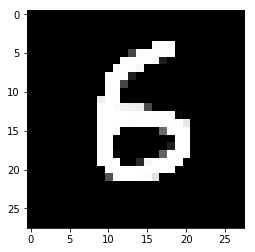

In [27]:
plt.imshow(arr_small, cmap="gray")